**FRCNN_TEST**

---




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python3 --version
import tensorflow as tf
print(tf.__version__)

Python 3.8.16
2.9.2


In [ ]:
#!pip3 uninstall tensorflow
#!pip3 install tensorflow==1.13.1
#!pip3 install tensorflow

 # Test FRCNN model

In [ ]:
cd /content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test

/content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test


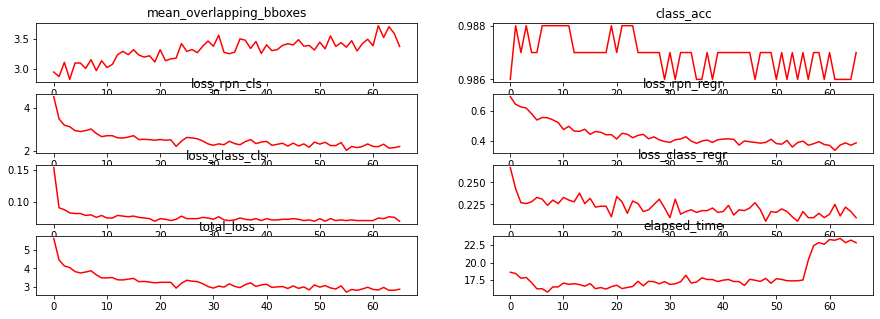

In [ ]:
# Load records of training, and view the accuracy and loss
from FRCNN import plotAccAndLoss
path = "/content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test"

plotAccAndLoss(path + '/FRCNN_vgg_66.csv')

1/1 [==============================] - 0s 56ms/step
Elapsed time = 8.76728367805481
[]


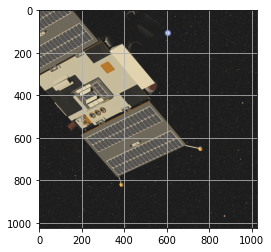

1/1 [==============================] - 0s 71ms/step
Elapsed time = 0.394763708114624
[]


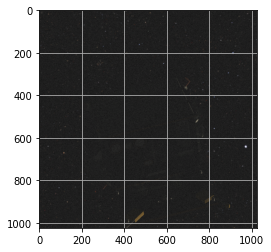

1/1 [==============================] - 0s 61ms/step
Elapsed time = 0.34221982955932617
[]


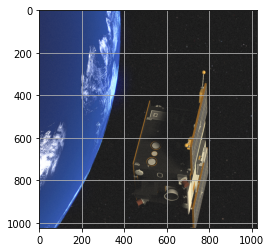

1/1 [==============================] - 0s 58ms/step
Elapsed time = 0.3994109630584717
[]


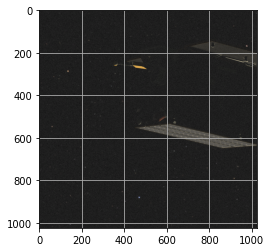

1/1 [==============================] - 0s 60ms/step
Elapsed time = 0.3991880416870117
[('proba_2', 42.284831404685974)]


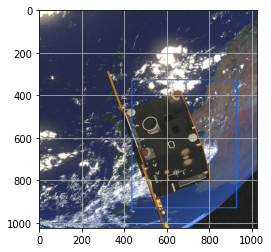

1/1 [==============================] - 0s 58ms/step
Elapsed time = 0.4068613052368164
[('proba_2', 25.459161400794983)]


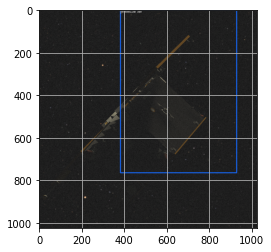

Total elapsed time = 12.224699258804321


In [ ]:
import math
parseAnnotation = False

# Parsing of data especially through Google Colab is slow, so we should save the results so that we do it once only
baseModelName = "FRCNN"
base_net_type = 'vgg'   # either 'vgg' or 'resnet50'
modelName = baseModelName + "_" + base_net_type
#model_path_name = modelName + ".hdf5"
model_path_name = "FRCNN_vgg_66.hdf5"


model_path = "/content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test/FRCNN_vgg_66.hdf5"
path_pickle = "/content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test/stream1_cvia.pickle"


im_size = 300                       # shorter-side length. Original is 600, half it to save training time
anchor_box_scales = [64,128,256]    # also half box_scales accordingly. Original is [128,256,512]
anchor_box_ratios = [[1,1], [1./math.sqrt(2), 2./math.sqrt(2)], [2./math.sqrt(2), 1./math.sqrt(2)]] # anchor box ratios area == 1
num_rois = 256
num_anchors = len(anchor_box_scales) * len(anchor_box_ratios)


import pickle
if parseAnnotation:
  # Load image information
  from FRCNN import parseAnnotationFile
  annotation_train_path = './annotation_train_cvia_demo_alldata.txt'
  classes_of_interest = [ 'cheops',
                            'debris',
                            'double_star',
                            'earth_observation_sat_1',
                            'lisa_pathfinder',
                            'proba_2',
                            'proba_3_csc',
                            'proba_3_ocs',
                            'smart_1',
                            'soho',
                            'xmm_newton',
                            'bg']
  train_data, classes_count, class_mapping = parseAnnotationFile(annotation_train_path, mode='simple', filteredList=classes_of_interest)

  annotation_test_path = './annotation_train_cvia_demo_alldata.txt'
  test_data, _ , _ = parseAnnotationFile(annotation_test_path, mode='simple', filteredList=classes_of_interest)
  
  with open(path_pickle, 'wb') as f2:
      pickle.dump((train_data, classes_count, class_mapping), f2)
  with open(path_pickle, 'wb') as f2:
      pickle.dump(test_data, f2)

else:
  # Load from pickle
  with open(path_pickle, 'rb') as f_in:
      train_data, classes_count, class_mapping = pickle.load(f_in)
  
  for i in range(len(train_data)):
    train_data[i]['filepath'] = train_data[i]['filepath'].replace('\\', '/')

  with open(path_pickle, 'rb') as f_in:
      test_data = pickle.load(f_in)


# Create model and load trained weights (Note: class mapping and num_classes should be based on training set)
from FRCNN import FRCNN
frcnn_test = FRCNN(input_shape=(None,None,3), num_anchors=num_anchors, num_rois=num_rois, base_net_type=base_net_type, num_classes = len(classes_count))
frcnn_test.load_config(anchor_box_scales=anchor_box_scales, anchor_box_ratios=anchor_box_ratios, num_rois=num_rois, target_size=im_size)
frcnn_test.load_weights(model_path)
frcnn_test.compile()

# Load array of images
from FRCNN import convertDataToImg
# test_imgs = convertDataToImg(test_data)
# predicts = frcnn_test.predict(test_imgs, class_mapping=class_mapping, verbose=2, bbox_threshold=0.5, overlap_thres=0.2)

import cv2
# path_imgs = "/content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test/train/*.png"

# Original
# ---------------------
# imgPaths = [(path_imgs, s) for s in path_imgs]
# test_imgs2 = []
# for path_1, s in imgPaths:
#     test_imgs2.append(cv2.imread(path_1, cv2.IMREAD_UNCHANGED))
# predicts = frcnn_test.predict(test_imgs2, class_mapping=class_mapping, verbose=2, bbox_threshold=0.5, overlap_thres=0.2)


# Modified
# ---------------------
from google.colab.patches import cv2_imshow
import glob
path_imgs = glob.glob("/content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test/train/*.png")

images = []
for img in path_imgs:
    images.append(cv2.imread(img))
predicts = frcnn_test.predict(images, class_mapping=class_mapping, verbose=2, bbox_threshold=0.1, overlap_thres=0.2)


# One Image
# ---------------------
# from google.colab.patches import cv2_imshow
# img_path = "/content/drive/MyDrive/ISM/CVIA/stream-1/frcnn_test/train/img000016.png"

# img = cv2.imread(img_path)
# print(img.shape)
# #cv2_imshow(img)
# predicts = frcnn_test.predict([img], class_mapping=class_mapping, verbose=2, bbox_threshold=0.1, overlap_thres=0.2)

Streaming output truncated to the last 5000 lines.
idx=63504
train/img036375.png could not be read
idx=63505
train/img032382.png could not be read
idx=63506
train/img030691.png could not be read
idx=63507
train/img037093.png could not be read
idx=63508
train/img039059.png could not be read
idx=63509
train/img034429.png could not be read
idx=63510
train/img032402.png could not be read
idx=63511
train/img039574.png could not be read
idx=63512
train/img031836.png could not be read
idx=63513
train/img030532.png could not be read
idx=63514
train/img031554.png could not be read
idx=63515
train/img039155.png could not be read
idx=63516
train/img039660.png could not be read
idx=63517
train/img031315.png could not be read
idx=63518
train/img038588.png could not be read
idx=63519
train/img035479.png could not be read
idx=63520
train/img039181.png could not be read
idx=63521
train/img033407.png could not be read
idx=63522
train/img033806.png could not be read
idx=63523
train/img031120.png could n

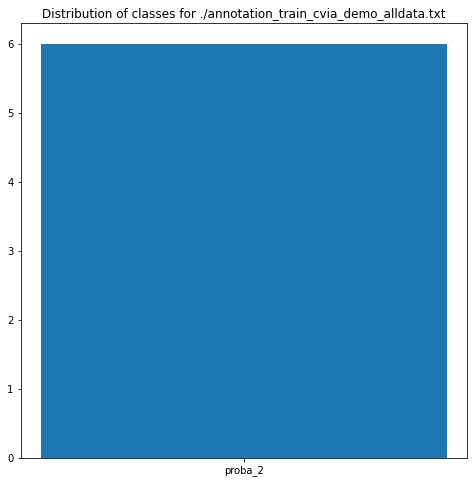

In [ ]:
from FRCNN import parseAnnotationFile
classes_of_interest = [ 'cheops',
                        'debris',
                        'double_star',
                        'earth_observation_sat_1',
                        'lisa_pathfinder',
                        'proba_2',
                        'proba_3_csc',
                        'proba_3_ocs',
                        'smart_1',
                        'soho',
                        'xmm_newton',
                        'bg']

annotation_test_path = './annotation_train_cvia_demo_alldata.txt'
test_data, _ , _ = parseAnnotationFile(annotation_test_path, mode='simple', filteredList=classes_of_interest)

Green: Ground truth bounding boxes. Red: Detected Objects
1/6 - train/img000013.png
1/1 [==============================] - 0s 52ms/step
Elapsed time = 0.4074859619140625
proba_2 AP: 0.000000


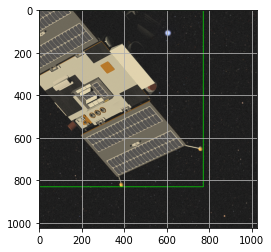

2/6 - train/img000007.png
1/1 [==============================] - 0s 65ms/step
Elapsed time = 0.4040517807006836
proba_2 AP: 0.000000


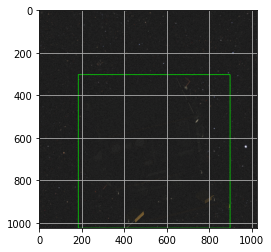

3/6 - train/img000004.png
1/1 [==============================] - 0s 58ms/step
Elapsed time = 0.4938347339630127
proba_2 AP: 0.000000


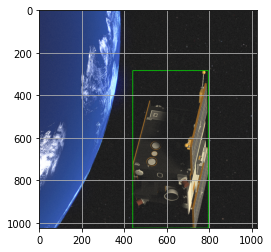

4/6 - train/img000015.png
1/1 [==============================] - 0s 58ms/step
Elapsed time = 0.3330671787261963
proba_2 AP: 0.000000


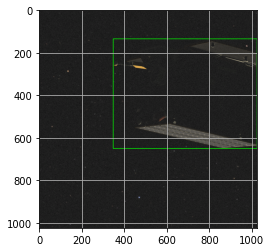

5/6 - train/img000016.png
1/1 [==============================] - 0s 70ms/step
Elapsed time = 0.390871524810791
proba_2 AP: 0.000000


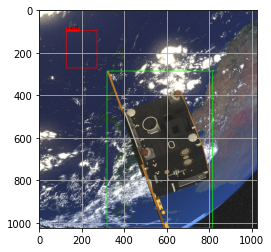

6/6 - train/img000010.png
1/1 [==============================] - 0s 56ms/step
Elapsed time = 0.383894681930542
proba_2 AP: 0.000000


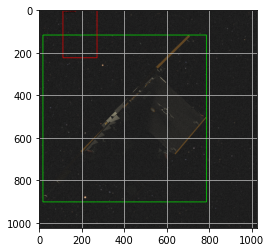

Total elapsed time = 3.930835723876953


In [ ]:
import numpy as np
evaluate = frcnn_test.evaluate(test_data, class_mapping=class_mapping, verbose=2)